# COGS 108 - Final Project 

*Fill in your overview here*

# Names

- Mariam Issa
- Andrea Sudharta
- Payam Sadeghian
- Brandon Amaral
- Alex Luo
- Jun Wang

# Group Members IDs

- A12285140
- A14497101
- A13654507
- A14133689
- A########
- A15743932

# Research Question

*Fill in your research question here*

## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis

*Fill in your hypotheses here*

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [2]:
import pandas as pd
import tweepy
from bs4 import BeautifulSoup
import datetime
from datetime import timedelta
import requests
import time

ModuleNotFoundError: No module named 'tweepy'

In [ ]:
tweeters_dem_df = pd.read_csv('popular-tweeters-dem.csv') #Dataframe for list of Democratic Party politicians
tweeters_rep_df = pd.read_csv('popular-tweeters-rep.csv') #Dataframe for list of Republican Party politicians
tweeters_dem_df['Party'] = 'D'
tweeters_rep_df['Party'] = 'R'
tweeters_df = pd.concat([tweeters_dem_df, tweeters_rep_df], ignore_index = True) # Dataframe for combined list of politicians

tweeters_handle = list(tweeters_df['Twitter_Handle']) #Python list for politician Twitter handles

In [ ]:
# Get OAuth from Twitter
import tweepy

consumer_key = 'bSZRBubFkHWewMi08ltv7DgAu'
consumer_secret = '6JFpZu66GT7OvoJFFxSfJJlX21NH5wxmMjNDbsQGPLyW9WtBSU'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

try:
    redirect_url = auth.get_authorization_url()
    print (redirect_url)
    
except tweepy.TweepError:
    print("Error! Failed to get request token.")

In [ ]:
# Verify Twitter account usage
verifier = raw_input('Verifier:')

In [ ]:
# Get Access Token
try: 
    auth.get_access_token(verifier)
except tweepy.TweepError:
    print ("Error! Failed to get access token.")

In [ ]:
# Save tokens
access_token = auth.access_token
acess_token_secret = auth.access_token_secret

# Note: You do not need to re-fetch it each time. Twitter currently does
# not expire the tokens, so the only time it would ever go invalid is if
# the user revokes our application access. 

#To rebuild an OAuthHandler from the stored access token

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(key, secret)

In [ ]:
# Check Set Up
api = tweepy.API(auth)
#api.update_status('tweepy + oauth!') # Posts directly on my timeline

In [ ]:
# Filter tweets to only include those containing key words
key_words_by_bill = {
    0:['#savetheinternet', '#netneutrality', 'internet', 'neutrality'], 
    1:['#medicareforall', '#universalhealthcare','#healthcare', 'health', 'care', 'health', 'care', 'medicare'], 
    2: ['#equalpay', '#equalrights', '#equalrightsammendment', '#era', '#women', '#genderinequality', '#genderequality', 'equal', 'rights', 'pay', 'women', 'gender', 'equality'],
    3:['#votingrights', '#votingrightact', '#electionintegrity', '#riggedelections', '#forthepeople', 'voting', 'rights', 'elections', 'fair', 'vote', 'votes'], 
    4:['#guncontrol', '#2ndammendment', '#noguncontol', '#gunviolence', '#gunrights', '#gunreform', '#2a', 'gun', 'second', '2nd',  'amendment'], 
    5:['#yemen', '#yemengenocide', 'yemen', 'yemeni', 'war', 'troops', 'withdraw troops', 'civil'], 
    6:['#women', '#reauthorizationact', '#violenceagainstwomen', '#genderbasedviolence', '#sexualviolence', 'women'],  
    7:['#buildthewall', '#buildthewallnow', '#nationalsecurity', '#nationalemergency', '#trumpswall', '#illegalimmigration', '#mexico', '#border', '#bordercrises', 'mexico', 'illegal', 'immigration', 'security', 'emergency', 'build', 'wall']
}

key_words = list({x for v in key_words_by_bill.itervalues() for x in v})

In [ ]:
# Define Intersection Function
def interSection(arr1,arr2): 
    return list(filter(lambda x: x in arr1, arr2)) 

In [ ]:
# Collect all tweets that deal with each bill in Congress
bill = [{}] * 8 # bill[bill_number] = {congressman: [tweets about bill]}
tweets = {}

In [ ]:
bill_title = {
    0: "Save the Internet",
    1: "Health Care",
    2: "Paycheck Fairness Act",
    3: "For the People Act 2019",
    4: "Background Check for Firearms",
    5: "Remove Troops from Yemen",
    6: "Violence against Women Reauthorization Act",
    7: "Trump's National Emergency"
}

In [ ]:
#Iterate through Congressmen
for handle in tweeters_handle:
    all_tweets = []

    for i in range(1000):
        try:
            tweets_from_page_i = api.user_timeline(handle, count = 200, page = i) # max count value is 200
        except:
            print("TweepError: stopped at handle: ", handle, " at page ", i)
        
        # Check if we reached end of Twitter history
        if len(tweets_from_page_i) == 0: 
            break
            
        #iterate through each tweet, sort by bill
        for tweet in tweets_from_page_i:
            tweet_tokens = (tweet.text).lower().split()
            
            # See if Tweet talks about bill matter
            for bill_number, bill_tokens in key_words_by_bill.items():
                if len(interSection(tweet_tokens, bill_tokens)) != 0:
                    if bill[bill_number] == {}:
                        bill[bill_number] = {handle:[tweet.text]}
                    else:
                        if handle not in bill[bill_number]:
                            bill[bill_number][handle] = [tweet.text]
                        else:
                            bill[bill_number][handle] += [tweet.text]
                    
                    # Compile to all tweets list
                    all_tweets.append(tweet.text)
                    
    # Collect congressman/woman's tweets         
    tweets[handle] = all_tweets
        
    # Sleep: to not overload Twitter requests
    time.sleep(45)

In [ ]:
#Create look up table for Congressman/woman's name and party
tweeters_party = list(tweeters_df['Party'])
tweeters_name = list(tweeters_df['Name'])

handle_to_party = {}
handle_to_name = {}
for i, handle in enumerate(tweeters_handle):
    handle_to_party[handle] = tweeters_party[i]
    handle_to_name[handle] = tweeters_name[i]

data = [] 

# List all tweets by bill it's associated with and the congressman who tweeted it
for i in range(len(bill)):
    for handle, tweet in bill[i].items():
        data.append([handle_to_name[handle], handle_to_party[handle], handle, bill_title[i], tweet])
        
tweeters_df = pd.DataFrame(data, columns = ['Name', 'Party', 'Twitter Handle', 'Bill #', 'Tweet'])

# Export CSV with Tweets
tweeters_df.to_csv('tweets_by_bill')

# Data Cleaning

Describe your data cleaning steps here.

In [ ]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [17]:
dataAnalysis = pd.read_csv('tweet_counts.csv')
dataAnalysis
x = 
dataAnalysis.describe()

,Background Check for Firearms,For the People Act 2019,Health Care,Paycheck Fairness Act,Remove Troops from Yemen,Save the Internet,Trump's National Emergency,Violence against Women Reauthorization Act
count,116.000000,116.000000,116.000000,117.000000,115.000000,110.000000,117.000000,117.000000
mean,45.681034,96.517241,96.017241,97.991453,30.356522,11.318182,76.341880,48.145299
std,36.887985,53.994925,66.037405,66.894474,31.470730,12.732918,42.527509,39.478992
min,5.000000,6.000000,9.000000,2.000000,2.000000,1.000000,6.000000,1.000000
25%,20.000000,61.500000,44.750000,49.000000,16.000000,3.000000,47.000000,21.000000
50%,37.500000,93.500000,85.000000,76.000000,23.000000,7.000000,68.000000,33.000000
75%,55.000000,126.750000,131.500000,136.000000,32.500000,13.750000,98.000000,59.000000
max,292.000000,450.000000,361.000000,356.000000,267.000000,68.000000,279.000000,179.000000


In [10]:
billAnalysis = pd.read_csv('tweets_by_bill')
billAnalysis

,Unnamed: 0,Name,Party,Twitter Handle,Bill #,Tweet
0,0,Earl Blumenauer,D,@repblumenauer,Save the Internet,[u'Maintaining a free and open internet is cri...
1,1,Daniel Webster,R,@RepWebster,Save the Internet,"[u'Great to tour @ThatCompanycom, an internet ..."
2,2,John Barrasso,R,@SenJohnBarrasso,Save the Internet,[u'RT @Senate_RPC: [New] The internet thrived ...
3,3,Louie Gohmert,R,@RepLouieGohmert,Save the Internet,"[u'""The bill is referred to as net neutrality ..."
4,4,Steve King,R,@SteveKingIA,Save the Internet,[u'Not one gray head in entire packed gallery ...
5,5,Ted Yoho,R,@RepTedYoho,Save the Internet,[u'RT @HouseGOP: Democrats\u2019 partisan plan...
6,6,Mitch McConnell,R,@senatemajldr,Save the Internet,"[u""RT @CNBC: John Thune: We can't let 'politic..."
7,7,Maxine Waters,D,@RepMaxineWaters,Save the Internet,"[u""RT @freepress: Today at noon, the Voices fo..."
8,8,Terri Sewell,D,@RepTerriSewell,Save the Internet,"[u""I'm proud to vote for the #SaveTheNet Act t..."
9,9,Mo Brooks,R,@RepMoBrooks,Save the Internet,[u'Proud to support passage of #HR3086 to perm...


In [13]:
billAnalysis['Twt_Count'] = billAnalysis['Tweet'].apply(lambda x: len(x))

count_pivot = billAnalysis.pivot_table(index = 'Name', columns = 'Bill #', values = 'Twt_Count')

billAnalysis

,Unnamed: 0,Name,Party,Twitter Handle,Bill #,Tweet,Twt_Count
0,0,Earl Blumenauer,D,@repblumenauer,Save the Internet,[u'Maintaining a free and open internet is cri...,3435
1,1,Daniel Webster,R,@RepWebster,Save the Internet,"[u'Great to tour @ThatCompanycom, an internet ...",281
2,2,John Barrasso,R,@SenJohnBarrasso,Save the Internet,[u'RT @Senate_RPC: [New] The internet thrived ...,150
3,3,Louie Gohmert,R,@RepLouieGohmert,Save the Internet,"[u'""The bill is referred to as net neutrality ...",685
4,4,Steve King,R,@SteveKingIA,Save the Internet,[u'Not one gray head in entire packed gallery ...,304
5,5,Ted Yoho,R,@RepTedYoho,Save the Internet,[u'RT @HouseGOP: Democrats\u2019 partisan plan...,459
6,6,Mitch McConnell,R,@senatemajldr,Save the Internet,"[u""RT @CNBC: John Thune: We can't let 'politic...",819
7,7,Maxine Waters,D,@RepMaxineWaters,Save the Internet,"[u""RT @freepress: Today at noon, the Voices fo...",885
8,8,Terri Sewell,D,@RepTerriSewell,Save the Internet,"[u""I'm proud to vote for the #SaveTheNet Act t...",1154
9,9,Mo Brooks,R,@RepMoBrooks,Save the Internet,[u'Proud to support passage of #HR3086 to perm...,96


NameError: name 'plt' is not defined

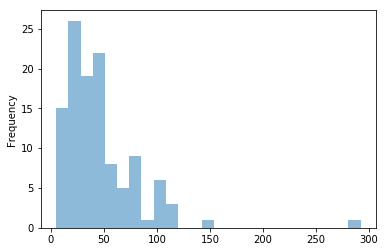

In [20]:
dataAnalysis['Background Check for Firearms'].plot.hist(bins=25, alpha=0.5)
f1 = plt.gcf()

NameError: name 'plt' is not defined

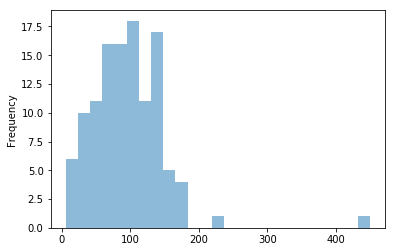

In [21]:
dataAnalysis['For the People Act 2019'].plot.hist(bins=25, alpha=0.5)
f2 = plt.gcf()

NameError: name 'plt' is not defined

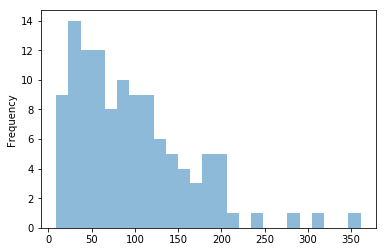

In [22]:
dataAnalysis['Health Care'].plot.hist(bins=25, alpha=0.5)
f3 = plt.gcf()

NameError: name 'plt' is not defined

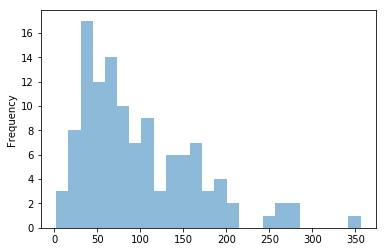

In [23]:
dataAnalysis['Paycheck Fairness Act'].plot.hist(bins=25, alpha=0.5)
f4 = plt.gcf()

NameError: name 'plt' is not defined

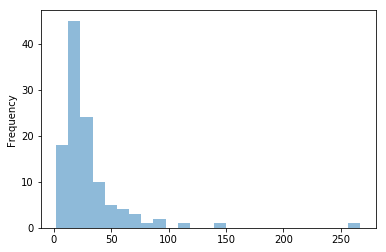

In [24]:
dataAnalysis['Remove Troops from Yemen'].plot.hist(bins=25, alpha=0.5)
f5 = plt.gcf()

NameError: name 'plt' is not defined

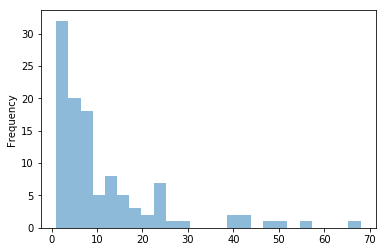

In [25]:
dataAnalysis['Save the Internet'].plot.hist(bins=25, alpha=0.5)
f6 = plt.gcf()

NameError: name 'plt' is not defined

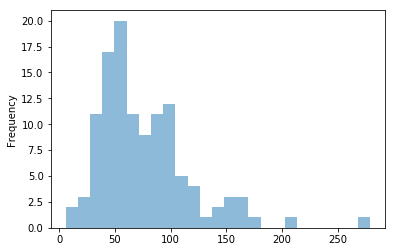

In [29]:
dataAnalysis['Trump\'s National Emergency'].plot.hist(bins=25, alpha=0.5)
f7 = plt.gcf()

NameError: name 'plt' is not defined

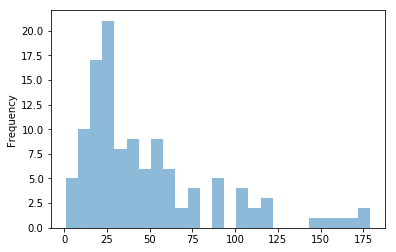

In [30]:
dataAnalysis['Violence against Women Reauthorization Act'].plot.hist(bins=25, alpha=0.5)
f8 = plt.gcf()

In [ ]:
billAnalysis['Twt_Count'] = billAnalysis['Tweet'].apply(lambda x: len(x))

count_pivot = billAnalysis.pivot_table(index = 'Name', columns = 'Bill #', values = 'Twt_Count')

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*